<a href="https://colab.research.google.com/github/purvikabajaj/Convolutional-Neural-Networks/blob/master/CNN_Cars_vs_Bus_(Kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import os 
import zipfile

In [59]:
local_zip = '/content/car-or-bus.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/car-or-bus')

local_zip = '/content/testing-car-or-bus.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/testing-car-or-bus')

zip_ref.close()

In [60]:
train_car_dir = os.path.join('/content/car-or-bus/car-or-bus/electric car')
train_bus_dir = os.path.join('/content/car-or-bus/car-or-bus/electric bus')

test_car_dir = os.path.join('/content/testing-car-or-bus/testing-car-or-bus/electric car')
test_bus_dir = os.path.join('/content/testing-car-or-bus/testing-car-or-bus/electric bus')

In [61]:
train_car_names = os.listdir(train_car_dir)
print(train_car_names[:10])

train_bus_names = os.listdir(train_bus_dir)
print(train_bus_names[:10])

test_car_names = os.listdir(test_car_dir)
print(test_car_names[:10])

test_bus_names = os.listdir(test_bus_dir)
print(test_bus_names[:10])

['electric-car-29.jpeg', 'electric-cars-196.jpeg', 'electric-cars-255.jpeg', 'image-564.jpeg', 'image-418.jpeg', 'image-589.jpeg', 'electric-cars-22.jpeg', 'image-89.jpeg', 'image-10.jpeg', 'image-507.jpeg']
['electric_bus-262.jpeg', 'electric_bus-104.jpeg', 'electric_bus-48.jpeg', 'electric_bus-393.jpeg', 'electric_bus-575.jpeg', 'electric_bus-561.jpeg', 'electric_bus-169.jpeg', 'electric_bus-560.jpeg', 'electric_bus-44.jpeg', 'electric_bus-380.jpeg']
['electric__image-108.jpeg', 'electric__image-129.jpeg', 'image-672.jpeg', 'image-780.jpeg', 'electric__image-5.jpeg', 'image-720.jpeg', 'image-661.jpeg', 'electric__image-78.jpeg', 'electric__image-75.jpeg', 'electric__image-100.jpeg']
['images-306.jpeg', 'images-157.jpeg', 'images-265.jpeg', 'images-217.jpeg', 'images-314.jpeg', 'images-233.jpeg', 'images-239.jpeg', 'images-220.jpeg', 'images-202.jpeg', 'images-187.jpeg']


In [62]:
print('TRAINING SET')
print('No. of Cars: ', len(os.listdir(train_car_dir)))
print('No. of Buses: ', len(os.listdir(train_bus_dir)))
print('\nTESTING SET')
print('No. of Cars: ', len(os.listdir(test_car_dir)))
print('No. of Buses: ', len(os.listdir(test_bus_dir)))

TRAINING SET
No. of Cars:  743
No. of Buses:  743

TESTING SET
No. of Cars:  191
No. of Buses:  191


In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [64]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/car-or-bus/car-or-bus',
    target_size = (150,150),
    batch_size = 128,
    class_mode = 'binary'
)
print(train_generator.classes[0])

Found 1486 images belonging to 2 classes.
0


In [65]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

(150, 150, 3)


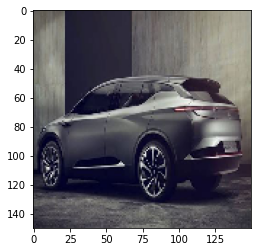

In [66]:
x,y = train_generator.next()
for i in range(0,1):
  image = x[i]
  plt.imshow(image)
  print(image.shape)

In [67]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/content/testing-car-or-bus/testing-car-or-bus',
    target_size =  (150,150),
    batch_size = 32,
    class_mode = 'binary'
)
print(validation_generator.classes[0])

Found 382 images belonging to 2 classes.
0


(150, 150, 3)


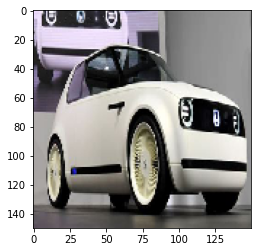

In [68]:
x,y = validation_generator.next()

for i in range(0,1):
  image = x[i]
  plt.imshow(x[i])
  print(image.shape)

In [69]:
'''class_names = train_generator.class_names
print(class_names)'''

'class_names = train_generator.class_names\nprint(class_names)'

In [70]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [71]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [72]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)       

In [73]:
from tensorflow.keras.optimizers import RMSprop

In [74]:
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr=0.001), metrics = ['accuracy'])

In [75]:
model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 8,
    #callbacks = tf.keras.callbacks.EarlyStopping(monitor='accuracy')
)

Epoch 1/15
8/8 [==============================] - 3s 377ms/step - loss: 2.1622 - accuracy: 0.4639 - val_loss: 0.6913 - val_accuracy: 0.5117
Epoch 2/15
8/8 [==============================] - 3s 359ms/step - loss: 0.6776 - accuracy: 0.5293 - val_loss: 0.6832 - val_accuracy: 0.5898
Epoch 3/15
8/8 [==============================] - 3s 348ms/step - loss: 0.6619 - accuracy: 0.6396 - val_loss: 0.6693 - val_accuracy: 0.7148
Epoch 4/15
8/8 [==============================] - 3s 344ms/step - loss: 0.6200 - accuracy: 0.7136 - val_loss: 0.6523 - val_accuracy: 0.7109
Epoch 5/15
8/8 [==============================] - 3s 338ms/step - loss: 0.6863 - accuracy: 0.6930 - val_loss: 0.6287 - val_accuracy: 0.7461
Epoch 6/15
8/8 [==============================] - 3s 349ms/step - loss: 0.5430 - accuracy: 0.7598 - val_loss: 0.5774 - val_accuracy: 0.7422
Epoch 7/15
8/8 [==============================] - 3s 344ms/step - loss: 0.4704 - accuracy: 0.7936 - val_loss: 0.5350 - val_accuracy: 0.7500
Epoch 8/15
8/8 [====

In [91]:
from google.colab import files
from keras.preprocessing import image
import numpy as np

In [92]:
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/'+fn
  img = image.load_img(path, target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  image = np.vstack([x])
  classes = model.predict(image, batch_size = 10)
  print(classes[0])
  if classes[0]>0.5:
    print('It is a car')
  else:
    print('It is a bus')

Saving Transpo_XcelsiorChargeCharging_TA.jpg to Transpo_XcelsiorChargeCharging_TA (1).jpg
[0.]
It is a bus
